# (Core) Project 1: Global Explanations
- Daniel Barella
- 3/24/23

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
## setting random state for reproducibility
SEED = 42
np.random.seed(SEED)

In [4]:
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [5]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
reg = loaded_joblib['RandomForestRegressor']

In [6]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [7]:
len(X_train_df)

6392

In [8]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,15.85,0.110653,36.9506,2007.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2497,15.10,0.087407,221.8456,1997.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7723,17.50,0.015592,184.8266,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8117,10.80,0.049820,243.2144,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7475,15.00,0.044999,140.4838,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [10]:
explainer = shap.Explainer(reg)
explainer

In [11]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [12]:
X_shap.shape

(400, 32)

In [13]:
shap_values.shape

(400, 32)

In [14]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-1.752966,6.206629,-1651.316898,-12.401522,4.928713,-1.863679,-0.456742,-0.978735,0.758011,1.556796,...,2.345372,0.497556,3.534661,-1.253276,2.564125,3.766630,166.153211,5.511730,4.411694,-59.609383
1,-196.893551,-370.498601,636.246852,-268.870853,-4.508755,-7.425136,2.596369,-3.460342,-2.228473,0.061914,...,-10.260737,-28.711098,-57.086850,-26.816383,-21.343239,2.036263,270.364952,8.850660,3.421948,-202.113669
2,12.587808,-0.442285,750.458029,-77.020600,-58.478273,-3.218224,0.163464,-5.329169,-8.572794,-1.420744,...,-10.378478,-13.845322,1.628717,-25.963712,-6.419260,5.825658,291.927524,3.527734,7.419096,-157.014034
3,-207.836951,-534.563466,1175.019255,-202.637750,-51.148780,-2.603572,-1.867183,-2.040509,-6.366532,10.523474,...,-75.934164,-6.274467,-39.123019,-23.790354,-20.506082,-0.497625,297.611829,4.931489,8.885815,-222.045040
4,42.800412,-79.844807,-324.509986,-130.897516,-9.772986,-0.446926,0.045382,0.371769,-2.843992,2.870730,...,-24.904005,-3.497988,3.465047,6.648054,4.059396,3.892087,225.483239,6.764337,8.895184,-117.748196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-151.560015,-176.334406,285.418688,-111.117629,-30.159936,-4.999489,1.332007,-5.771240,-2.753897,-3.358188,...,-37.764243,-11.876464,-26.550381,-18.609314,-16.768568,-14.923943,238.270940,4.370758,-0.201402,-177.624348
396,64.196734,87.109855,-4.003381,-54.254130,18.611369,-0.740938,-1.862748,-0.250756,-1.525295,0.593767,...,-0.876941,4.209561,3.068110,-4.393118,-0.894482,-13.543241,251.965848,-22.741351,-5.427800,-91.148270
397,-7.722405,-23.397303,-432.440050,-149.913524,-12.798422,-1.327649,-3.041492,-0.862335,-3.810864,1.560244,...,-2.362531,-2.492480,-8.526661,-4.235400,-7.049819,-30.559682,215.933988,-65.547609,-40.810035,-97.256220
398,230.794224,141.263796,588.597559,28.334539,-1.031110,1.717449,-1.302531,3.318525,94.891420,20.190436,...,14.957644,6.686169,4.808565,4.545896,50.241796,17.498330,309.350443,11.431244,7.200867,-110.679840


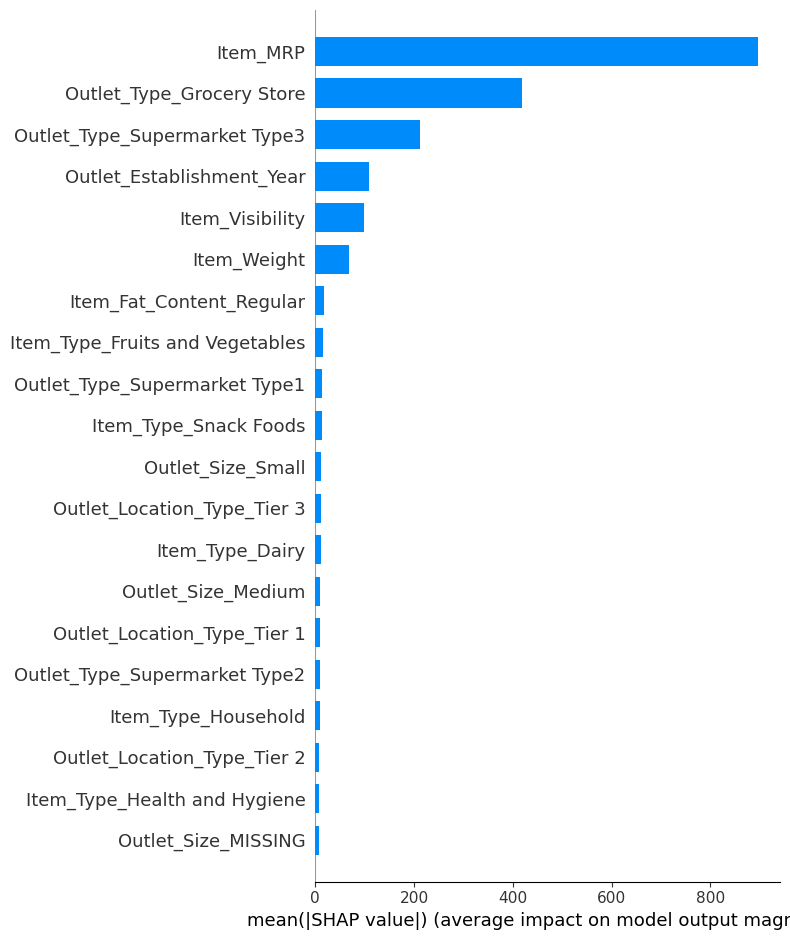

In [17]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap, plot_type='bar')
ax.set_title('Summary Plot - Reg Shap');
fig.savefig('images/summary_plot_reg_shap.png')

![Feature Importance](RandomForestRegressor.png)

- Both show Item_MRP as being the most important feature.
- Outlet_Type_Grocery Store is also coming in as a strong second for both graphs.
- Our original graph shows Item_Visibility in third place, but the shap graph shows us Outlet_Type_Supermarket Type3 in third.

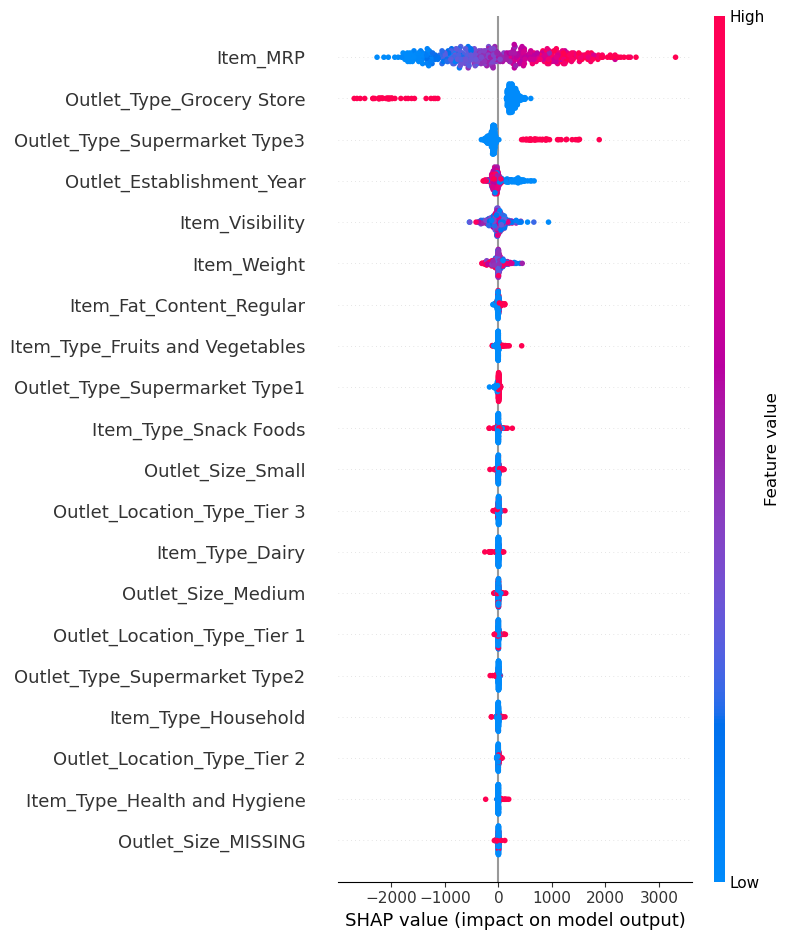

In [18]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap, plot_type='dot')
ax.set_title('Summary Plot - Reg Shap Dot');
fig.savefig('images/summary_plot_reg_shap_dot.png')

- The higher the Item_MRP, the higher the Shap value
- If it is a Outlet_Type_Grocery Store, then it's will have a lower shap value.
- If it is a Outlet_Type_Supermarket Type3 then it is going to positively affect the shap value.